In [124]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [125]:
#2. Read data
import yfinance as yf

data = yf.download(tickers = "NEM", start="2017-12-01", end="2023-06-16", interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,37.070000,37.610001,36.779999,37.189999,31.313091,5074400
2017-12-04,37.240002,37.240002,36.660000,36.840000,31.018410,3777300
2017-12-05,36.599998,36.799999,36.070000,36.200001,30.479548,5984100
2017-12-06,36.250000,36.400002,35.779999,35.830002,30.168018,5797400
2017-12-07,35.529999,36.130001,35.450001,35.919998,30.307224,4047700
...,...,...,...,...,...,...
2023-06-09,41.930000,42.009998,41.290001,41.459999,41.459999,5601300
2023-06-12,41.400002,42.070000,41.279999,42.040001,42.040001,6618100
2023-06-13,42.250000,42.549999,42.090000,42.439999,42.439999,7955900


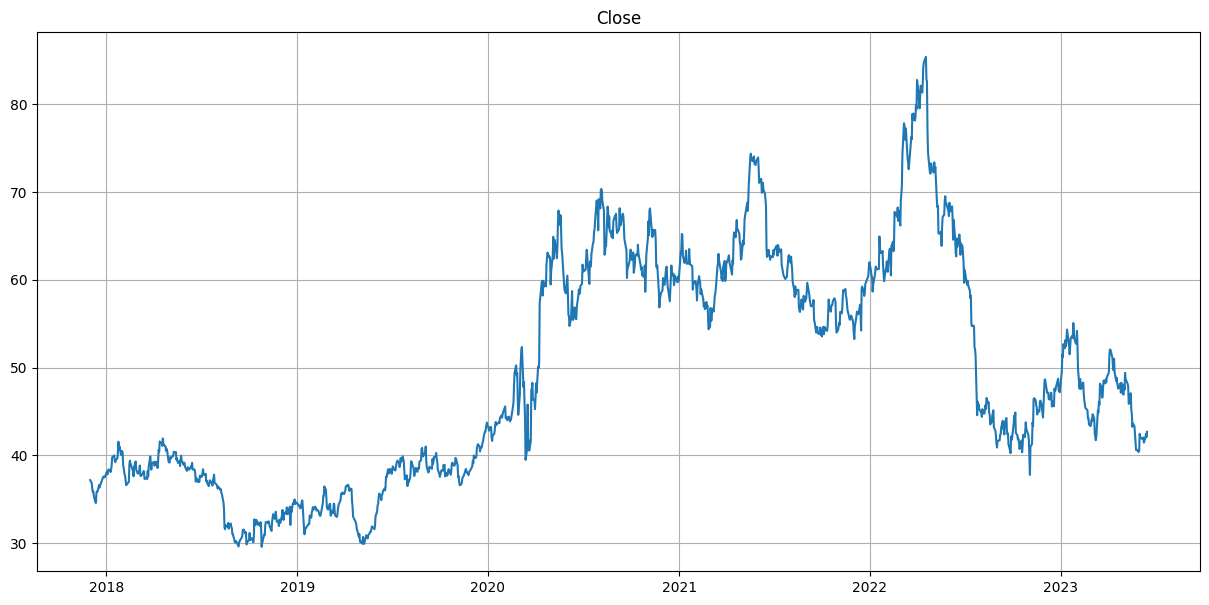

In [126]:
plt.figure(figsize=(15, 7))
plt.plot(data['Close'])
plt.title('Close')
plt.grid(True)
plt.show()

In [127]:
data = data.reset_index('Date', inplace=False)

In [128]:
# 4. Split train test
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [129]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [130]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [132]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [133]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [134]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
#y_pred = model.predict(n_periods=len(y_test))

# 7. Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [135]:
y_pred = simple_exp.predict(test_data.index)

In [136]:
y_pred_val= simple_exp.predict(val_data.index)

In [137]:
#8. Predict next 30 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+30))
y_next_30_days = simple_exp.predict(fh)

In [139]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 12.155630486211036
Validation RMSE: 10.3760723933805
Testing MAE: 10.10428056642715
Validation MAE: 9.769570252683993
Testing MAPE: 0.180860411083654
Validation MAPE: 0.21335276888011845


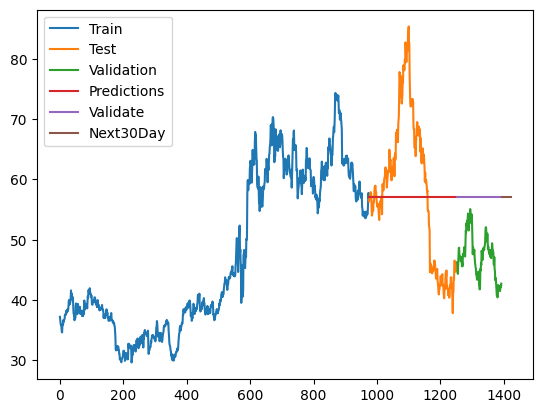

In [140]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()